# Example of loading a FITS image with PEDRA and performing basic operations

In this notebook, we will:
  - Open a fits image from a telescope
  - Check some image properties and header
  - View the image
  - trim, rebin and normalize

In [1]:
import pedra

/home/mario/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading a fits image

If needed, you can check the fits structure. Proper documentation about the FITS file structure should be available at observatory website.

In [8]:
# E.g. a Hubble Telescope WTF image 
pedra.check_fits_structure('../../../qh/hst/data/2009-WN87/F625W/ieca20dkq_drz.fits');

Filename: ../../../qh/hst/data/2009-WN87/F625W/ieca20dkq_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     803   ()      
  1  SCI           1 ImageHDU        85   (1030, 1087)   float32   
  2  WHT           1 ImageHDU        45   (1030, 1087)   float32   
  3  CTX           1 ImageHDU        40   (1030, 1087)   int32   
  4  HDRTAB        1 BinTableHDU    559   1R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 15A, 4A, 1A, 4A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 19A, 1A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 20A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 3A, D, 10A, 8A, 8A, 23A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D

in the example above the header is on the FITS extension 0, and the data on 1

To load the FITS with PEDRA, the structure must be specified as follows:

In [3]:
pedra.loadimage?

Signature:
pedra.loadimage(
    imgfile,
    data_ext=1,
    header_ext=0,
    wcs_ext=None,
    err_ext=None,
    mask=None,
    label=None,
    **kwargs,
)
Docstring:
Load Image from file. 

Parameters
----------
imgfile: string
    Image file path.

data_ext: int 
    Fits file extention for image data. 
    Default is 0. 

header_ext: int 
    Fits file extention for header info. 
    Default is 0. 
     
wcs_ext: None or int (Optional)
    Fits file extention for WCS info. 
    Default is None, which is for when WCS is not specified in the header.
    
err_ext: None or int (Optional)
    Fits file extention for WCS info. 
    Default is None, which will not get an error array.
    
mask: None or np.ndarray (Optional)
    Boolean numpy array for masking pixels in the image.
    Shape must be equal to data. Default is None.

label: string (Optional)
    Image label. If not specified will get the base filename as label. 

**kwargs: Accepts kwargs for Astropy.io.fits.open

Returns
---

In [4]:
img = pedra.loadimage('../../../qh/hst/data/2009-WN87/F625W/ieca20dkq_drz.fits', 
                      data_ext=1, hdr_ext=0, wcs_ext=1, err_ext=2)

### Some image properties

In [5]:
# Basic image info
img

Image label: ieca20dkq_drz.fits 
 Shape: (1087, 1030) 
 WCS: True 
 Error array: True 
 Mask: False 

In [6]:
# Center Pixel
# X, Y
img.centerpixel

(543, 515)

In [19]:
# Center Coordinates (from WCS)
# RA, Dec
img.centercoords

<SkyCoord (ICRS): (ra, dec) in deg
    (236.49007594, -24.22843671)>

### Checking Image Header

In [22]:
# Display full header
img.hdr_window()
# or img.hdr to simply diplay here

invalid command name "128271973764864<lambda>"
    while executing
"128271973764864<lambda>"
    ("after" script)


In [10]:
# Get some Header value
print(f"Target: {img.hdr['TARGNAME']}")
print(f"RA: {img.hdr['RA_TARG']}, DEC: {img.hdr['DEC_TARG']}")
print(f"Date of Observation: {img.hdr['DATE-OBS']}, Exposure Time: {img.hdr['EXPTIME']}")


Target: 2009-WN87
RA: 236.4901566138, DEC: -24.22800917879
Date of Observation: 2021-07-31, Exposure Time: 110.0


# Viewing image

### Quick View image

If the image has a WCS, you can plot sky directions

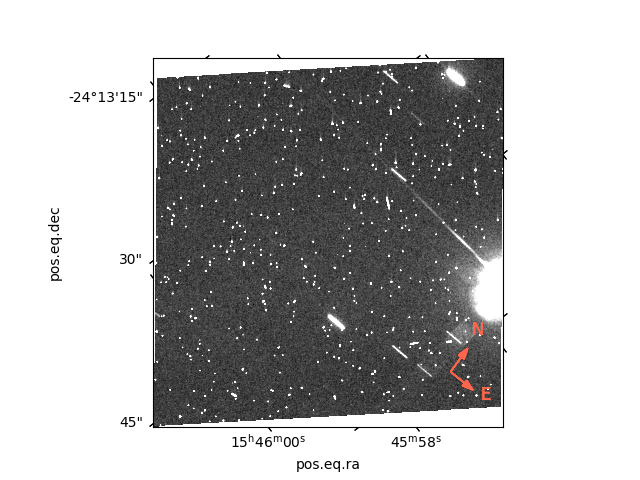

In [15]:
img.view(cardinal='NE', show=True);

In [10]:
img.wcs.

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 236.49015087408554 -24.228002210606864 
CRPIX : 515.0 543.5 
CD1_1 CD1_2  : -8.7215481246049e-06 -6.7124404436892e-06 
CD2_1 CD2_2  : -6.7124404436892e-06 8.72154812460495e-06 
NAXIS : 1030  1087